# Tools for Data Science – Time Series Exercises

In this exercise you will study Akron air quality data. 

In [3]:
# imports and setup 
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## 1: Akron Air Quality Index 

In this problem, you'll study the Air Quality in Akron. 

### Task 1.0.  Learn about AQI

Read about the [air quality index (AQI)](https://airnow.gov/index.cfm?action=aqibasics.aqi) and the 
[AirNow](https://airnow.gov/index.cfm?action=topics.about_airnow) system. 


### Task 1.1. Download data
The EPA gives access to historical air quality data at the AirData website. Read about the data available on [this information page](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).


Go to [this website](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the following daily data: 
+ Pollutant = PM2.5
+ Year = 2023
+ City = Akron, OH
+ Monitor Site = All Sites



### Task 1.2. Import the data 
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean:

+ The dates are not sorted. 
+ Some dates may have missing values.
+ Some dates may have multiple values corresponding to different sensors (POC=1,2,3,4,5) and different sites.

In [6]:
df = pd.read_csv("akrondata.csv")
print(df.columns) # Did this just to see the columns so I know what I am working with

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'Method Description', 'CBSA Code', 'CBSA Name',
       'State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude'],
      dtype='object')


### Task 1.3. Plot the data

1. The data contains multiple PM2.5 concentration and AQI entries for the same date measured at different sites and with different sensors (POCS). Plot average PM2.5 and AQI values with respect to date in a single figure. Anyone analysing the graph should be able to answer, what is the average PM 2.5 concentration or the AQI value on a particular date. 



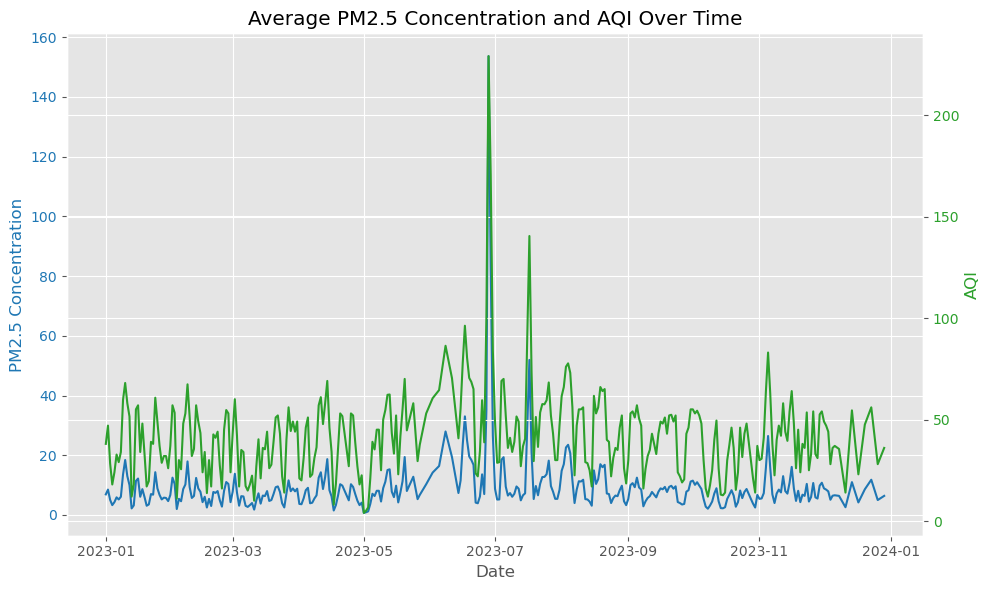

In [8]:
# Clean the data a little so date column is in right format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and calculate mean for PM2.5 and AQI
avg_data = df.groupby('Date')[['Daily Mean PM2.5 Concentration', 'Daily AQI Value']].mean().reset_index()

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average PM2.5 values
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Concentration', color='tab:blue')
ax1.plot(avg_data['Date'], avg_data['Daily Mean PM2.5 Concentration'], label='Average PM2.5', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for AQI
ax2 = ax1.twinx()
ax2.set_ylabel('AQI', color='tab:green')
ax2.plot(avg_data['Date'], avg_data['Daily AQI Value'], label='Average AQI', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title and formatting
plt.title("Average PM2.5 Concentration and AQI Over Time")
fig.tight_layout()
plt.show()

### Task 1.4. Plot a moving average

Make a plot with both the daily AQI value and a moving average for the daily AQI value. Use the daily AQI value that is averaged over the sites and POC. Experiment with different time windows to find one that is reasonable.

*Hint:* Use the rolling() function. 

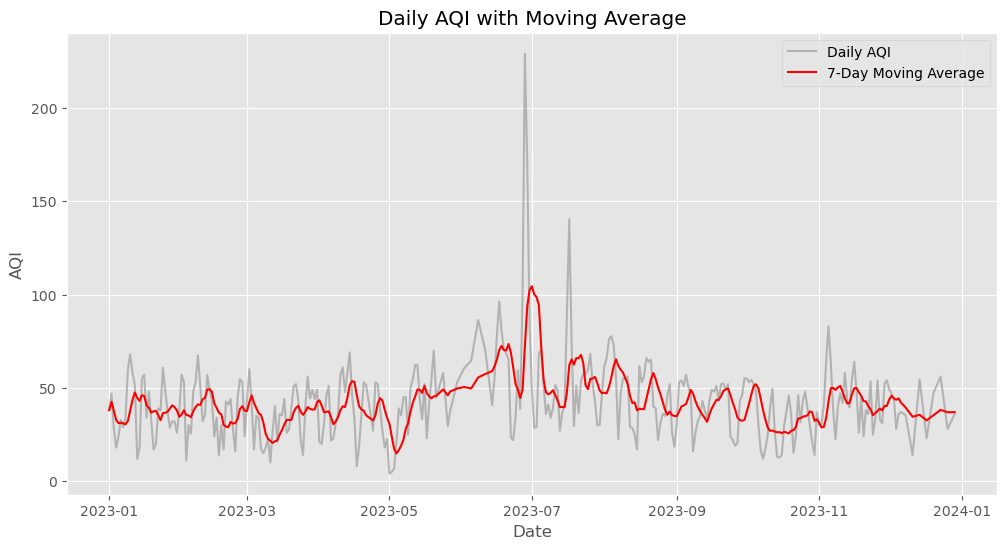

In [10]:
# Compute daily average AQI
daily_avg_aqi = df.groupby('Date')['Daily AQI Value'].mean().reset_index()

# Apply moving average (I just tried 7)
window_size = 7 
daily_avg_aqi['AQI Moving Avg'] = daily_avg_aqi['Daily AQI Value'].rolling(window=window_size, min_periods=1).mean()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot original daily AQI values
plt.plot(daily_avg_aqi['Date'], daily_avg_aqi['Daily AQI Value'], label='Daily AQI', color='gray', alpha=0.5)

# Plot moving average
plt.plot(daily_avg_aqi['Date'], daily_avg_aqi['AQI Moving Avg'], label=f'{window_size}-Day Moving Average', color='red')

# Labels/titles
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Daily AQI with Moving Average')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()